In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
# Caso eu esteja usando onaconda ou o jupyter lab ele não vai gerar uma nova aba com o plot
#Só irá exibir abaixo da celula, ou seja, integrado a IDE
%matplotlib inline
from matplotlib.pylab import rcParams
#Configurando o tamnanho da imagem
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
#Instalando o pacote arima
!pip install pmdarima
from pmdarima.arima import auto_arima

In [22]:
#Conversão das atribuições que estão no formato string para o formato ano-mês
dataparse = lambda dates : datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col = 'Month', date_parser=dataparse)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


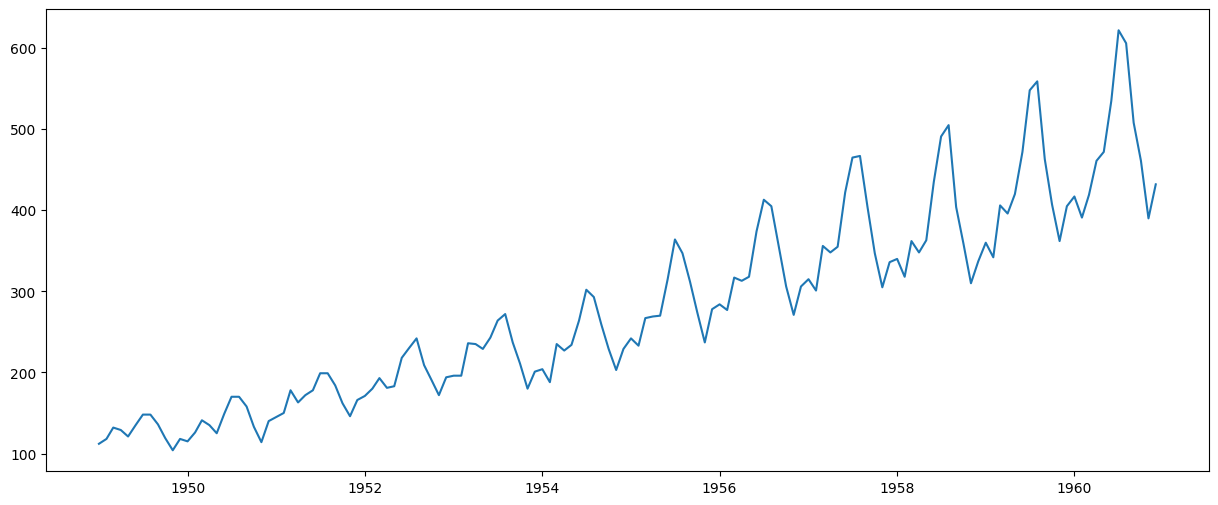

In [23]:
plt.plot(data['#Passengers'])

In [26]:
stepwise_model = auto_arima(data, start_p=1, start_q=1, start_d=0, start_P = 0, max_p=6 , max_q=6, m=12, seasonal=True, trace=True, stepwise=False)


 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.64 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=1.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.26 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.84 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=1.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.52 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.82 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.49 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.52 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=1.58 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.75 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.63 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=2.37 sec
 ARIM

In [25]:
# Vendo o resultado final do modelo, porém com o otimizador stepwise ligado
stepwise_model.aic()

1019.1780567487713

In [28]:
#1012.9907964895799
# Resultado com o modelo testando todas as posibilidade
# Darei continuidade com o menor valor
stepwise_model.aic()

1012.9907964895799

In [29]:
#Separando dados de treino e teste
train = data.loc['1949-01-01': '1959-12-01']
test = data.loc['1960-01-01' :]

In [32]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [31]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [33]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [35]:
#Tentando prever os proximos 12 meses
future_forecast = stepwise_model.predict(n_periods=12)

In [36]:
future_forecast

1960-01-01    420.248524
1960-02-01    398.467270
1960-03-01    461.924955
1960-04-01    450.705407
1960-05-01    474.027678
1960-06-01    537.927076
1960-07-01    612.254751
1960-08-01    623.611980
1960-09-01    520.187427
1960-10-01    462.338878
1960-11-01    412.953715
1960-12-01    453.780372
Freq: MS, dtype: float64

In [39]:
future_forecast = pd.DataFrame(future_forecast, index= test.index, columns = ['#Passengers'])
future_forecast

,#Passengers
Month,
1960-01-01,420.248524
1960-02-01,398.467270
1960-03-01,461.924955
1960-04-01,450.705407
1960-05-01,474.027678
1960-06-01,537.927076
1960-07-01,612.254751
1960-08-01,623.611980
1960-09-01,520.187427


In [ ]:
future_forecast

<Axes: xlabel='Month'>

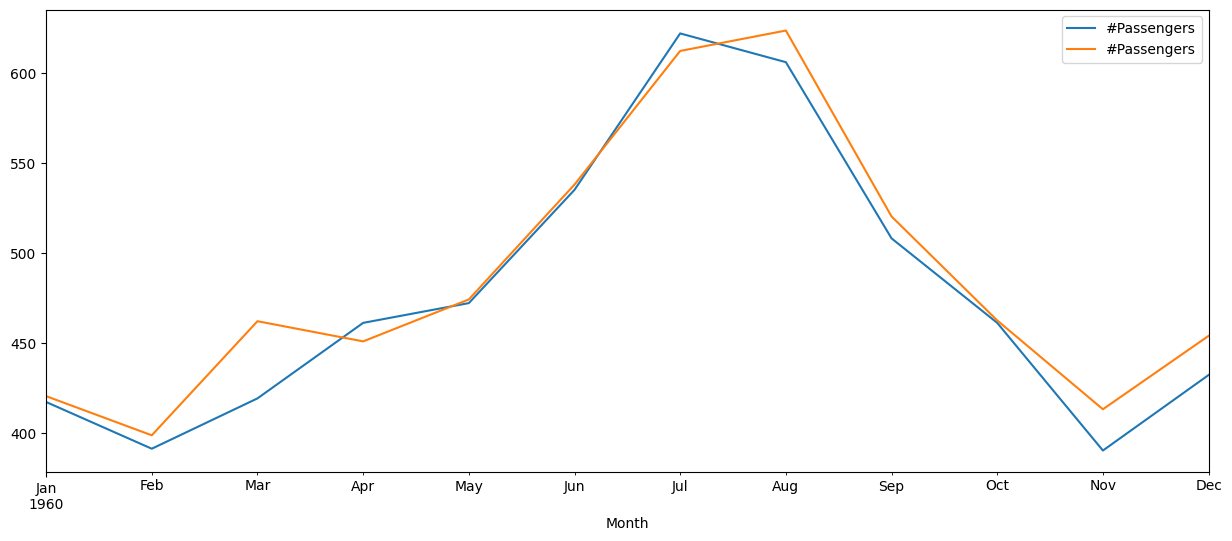

In [42]:
pd.concat([test, future_forecast], axis = 1).plot()

<Axes: xlabel='Month'>

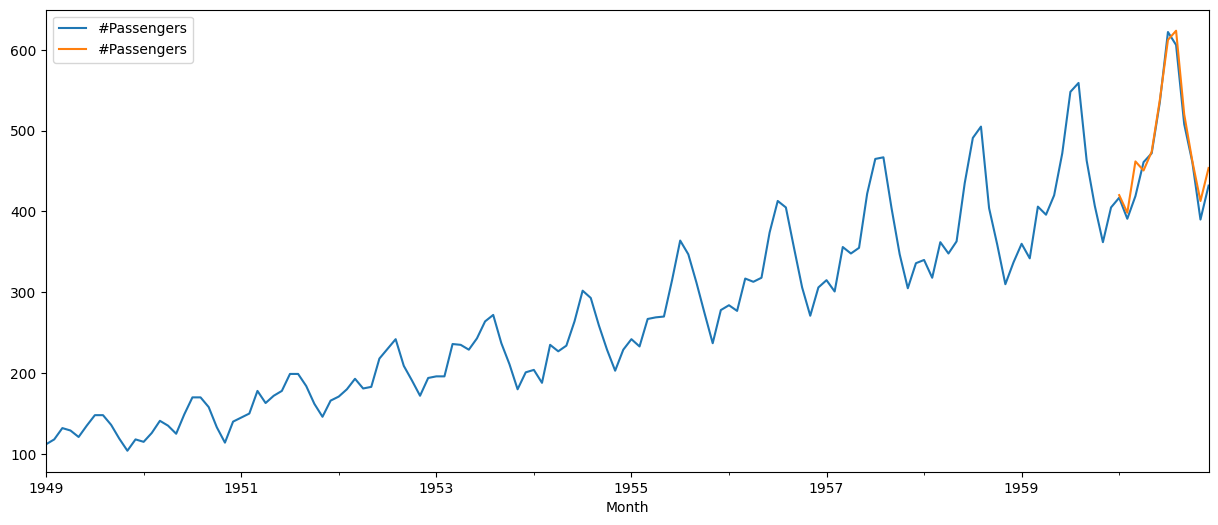

In [47]:
#Largura da linha de 3px
pd.concat([data, future_forecast], axis = 1).plot(linewidth=3)